In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [101]:
I = np.arange(0.0, 1.3, 0.1) * 2997924536.843
display(I)

array([0.00000000e+00, 2.99792454e+08, 5.99584907e+08, 8.99377361e+08,
       1.19916981e+09, 1.49896227e+09, 1.79875472e+09, 2.09854718e+09,
       2.39833963e+09, 2.69813208e+09, 2.99792454e+09, 3.29771699e+09,
       3.59750944e+09])

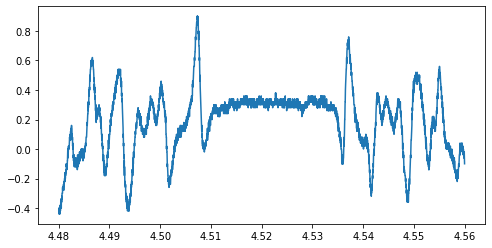

In [143]:
data = pd.read_csv("./zeeman/scope_csv_12.csv")
t, ch0, ch1, ch2, ch3 = np.array(data.iloc[:, 0]), np.array(data.iloc[:, 1]), np.array(data.iloc[:, 2]), np.array(data.iloc[:, 3]), np.array(data.iloc[:, 4])

plt.figure(figsize=(8, 4))
# plt.subplot(121)
plt.plot(t, ch3)
# plt.plot(t, ch0*10)
# plt.subplot(122)
# plt.plot(t, ch0)
# plt.plot(t, 10*ch0)

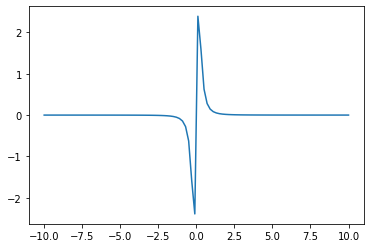

In [89]:
def disp(x, nu0, gamma, ampl):
    return 0.5 * (gamma)**2 * (x - nu0) / ((x - nu0)**2 + (gamma/2)**2)**2


def disp_sum(x, nu0, gamma, ampl):
    res = np.zeros(x.shape[0])

    for i in range(nu0.shape[0]):
        res += 0.5 * (gamma[i])**2 * (x - nu0[i]) / ((x - nu0[i])**2 + (gamma[i]/2)**2)**2
    return res


nu = np.linspace(-10, 10, 100)


plt.plot(nu, disp(nu, 0, 0.5, 1))
# plt.plot(nu, disp_sum(nu, np.array([0, 2]), np.array([2, 2]), np.array([1, 0.5])))

In [100]:
delta_Doppler = 2 * 384e12 / 3e8 * np.sqrt(2 * 1.38e-23*1e-4*np.log(2)/(86 * 1.66e-27))
delta_Doppler / 1e6

0.2963493419562901

In [103]:
#В СГС

magneton = 9.2740091523e-21
c = 2.997924e10
Gamma = 6.066618e6

N = 2500
L = 46
d = 8
n = N / L

# Магнитное поле в гауссах(G)
B = 4*np.pi * n * I/c
B

array([ 0.        ,  6.82955047, 13.65910094, 20.48865141, 27.31820188,
       34.14775235, 40.97730282, 47.80685329, 54.63640376, 61.46595423,
       68.2955047 , 75.12505517, 81.95460564])

In [123]:
def zeeman_Rb87_D2_F2_F1(B, color="blue"):
    gfs2 = 0.70e6
    gfp1 = 0.93e6
    mf2s = np.arange(-2, 3, 1)
    mf1p = np.arange(-1, 2, 1)
    
    s2 = magneton * B * gfs2 * mf2s
    p1 = magneton * B * gfs2 * mf1p

    sp11 = p1[0] + s2[0]
    sp22 = p1[1] + s2[1]
    sp33 = p1[2] + s2[2]
    
    sp31 = p1[0] + s2[2]
    sp42 = p1[1] + s2[3]
    sp53 = p1[2] + s2[4]
    
    splits = np.array([sp11, sp22, sp33, sp31, sp42, sp53])
    
    for el in splits:
        plt.axvline(x=el, ymin=0.0, ymax=1.0)
#         plt.fill_between(x=[el-1e6, el+1e6], y1=[0.0, 0.0], y2=[1.0,1.0], color="blue", alpha=0.2)

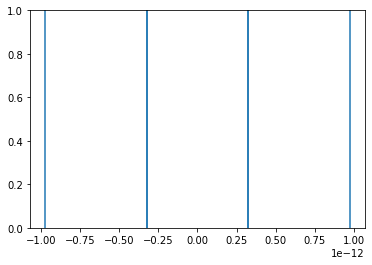

In [124]:
zeeman_Rb87_D2_F2_F1(50, "blue")
# zeeman_Rb87_D2_F2_F1(100, "red")